<a href="https://colab.research.google.com/github/AftabQuant/AftabQuant/blob/main/Feature%20Extraction%20-%20with%20%26%20without%20data%20augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.regularizers import L2
from keras.utils import image_dataset_from_directory
from keras.callbacks import EarlyStopping

In [3]:
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')
zip_ref.extractall('my_data')
zip_ref.close()

## **VGG 16 Model**

In [4]:
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
                  weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.trainable = False

# **Without Data Augmentation**

In [10]:
train_ds = image_dataset_from_directory(
    "/content/my_data/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary',
)

test_ds = image_dataset_from_directory(
    "/content/my_data/test",
    batch_size=32,
    image_size=(150, 150),
    label_mode='binary',
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
def processing(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(processing)
test_ds = test_ds.map(processing)

In [12]:
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [13]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=EarlyStopping(patience=6))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 136ms/step - accuracy: 0.4865 - loss: 0.7744 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.4874 - loss: 0.7740 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 135ms/step - accuracy: 0.4856 - loss: 0.7752 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.4861 - loss: 0.7749 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.4857 - loss: 0.7749 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.4866 - loss: 0.7742 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.4854 - loss: 0.7749 - val_accuracy: 0.4872 - val_loss: 0.7740
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.4855 - loss: 

# **With Data Augmentation**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/content/my_data/train",
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
         "/content/my_data/test",
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [23]:
model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=EarlyStopping(patience=6))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.8915 - loss: 0.2495 - val_accuracy: 0.9152 - val_loss: 0.2036
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 258ms/step - accuracy: 0.9018 - loss: 0.2215 - val_accuracy: 0.9136 - val_loss: 0.2034
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.9109 - loss: 0.2091 - val_accuracy: 0.9194 - val_loss: 0.1917
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9084 - loss: 0.2124 - val_accuracy: 0.9222 - val_loss: 0.1883
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.9199 - loss: 0.1870 - val_accuracy: 0.9222 - val_loss: 0.1884
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.9221 - loss: 0.1808 - val_accuracy: 0.9188 - val_loss: 0.1918
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 257ms/step - accuracy: 0.9322 - loss: 0.1617 - val_accuracy: 0.9206 - val_loss: 0.1848
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 257ms/step - accuracy: 0.9343 -

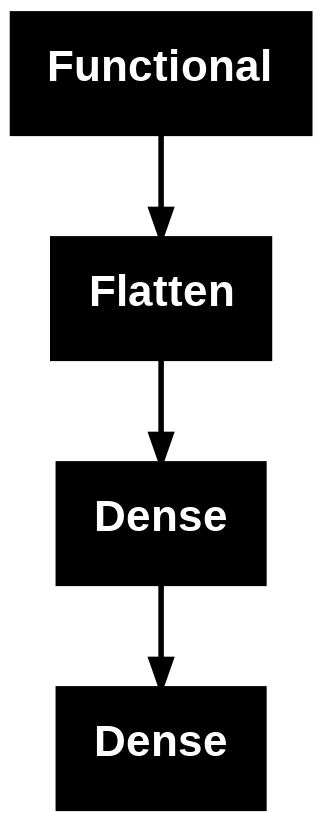

In [25]:
from keras.utils import plot_model
plot_model(model)